# 사전 준비

## Kaggle 데이터 불러오기

### Kaggle API 설치

In [1]:
!pip install kaggle

### Kaggle Token 다운로드

- 아래 코드는 Kaggle API 토큰을 업로드 하는 코드이다.

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# kaggle.json을 아래 폴더로 옮긴 뒤, file을 사용할 수 있도록 권한을 부여한다. 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 63 bytes


- 실제로 kaggle.json 파일이 업로드 되었는지 확인

In [3]:
ls -1ha ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


### 구글 드라이브 연동

In [4]:
from google.colab import drive # 패키지 불러오기 
from os.path import join  

# 구글 드라이브 마운트
ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 

# 프로젝트 파일 생성 및 다운받을 경로 이동
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/python_basic/kaggle_titanic/data'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/python_basic/kaggle_titanic/data


In [5]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/python_basic/kaggle_titanic/data


### kaggle competition list 불러오기

- 캐글 대회 목록 불러오기

In [6]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        134           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        161           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        292           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2248           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      17260            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4325            True  
connectx

### Titanic: Machine Learning from Disaster 데이터셋 불러오기

- 타이타닉 대회 데이터를 가져오는 코드이다.

In [8]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 7.40MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 439kB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 3.95MB/s]


- 리눅스 명령어 ls는 경로(폴더) 내 모든 데이터 파일을 보여준다.

In [9]:
!ls

gender_submission.csv  test.csv  train.csv


## 캐글 데이터 수집 및 EDA

우선 데이터를 수집하기에 앞서서 EDA에 관한 필수 패키지를 설치하자.

In [10]:
import pandas as pd # 데이터 가공, 변환(dplyr)
import pandas_profiling # 보고서 기능 # 아나콘다 할 때... 실습
import numpy as np # 수치 연산 & 배열, 행렬
import matplotlib as mpl # 시각화
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

from IPython.core.display import display, HTML

### 데이터 수집

여기에서는 우선 `test.csv` & `train.csv` 파일을 받도록 한다. 

In [11]:
# 경로 변경 (프로젝트 파일 생성 및 다운받을 경로 이동)
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/python_basic/kaggle_titanic'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/python_basic/kaggle_titanic


In [12]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/python_basic/kaggle_titanic


In [13]:
!ls

data  source


In [14]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print("data import is done")

data import is done


### 데이터 확인

- `Kaggle` 데이터를 불러오면 우선 확인해야 하는 것은 데이터셋의 크기다. 
  + 변수의 갯수
  + 수치형 변수 & 범주형 변수의 개수 등을 파악해야 한다.
- Point 1 - `train`데이터에서 굳이 훈련데이터와 테스트 데이터를 구분할 필요는 없다. 
  + 보통 `Kaggle`에서는 테스트 데이터를 주기적으로 업데이트 해준다.
- Point 2 - 보통 `test` 데이터의 변수의 개수가 하나 더 작다. 


In [15]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

- 그 후 `train`데이터의 `상위 5개`의 데이터만 확인한다. 

In [16]:
display(df_train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 그 다음 확인해야 하는 것은 `수치형` 변수와 `범주형` 변수를 구분한다. 
  + 먼저 `numerical_features`를 구분하자.
- 데이터의 변수가 많아서, 일단 숫자형과 문자형으로 분리한 후, EDA를 하려고 한다.
- 아래 코드는 `train`데이터에서 숫자형 변수만 추출하는 코드이다.

In [17]:
numeric_features = df_train.select_dtypes(include = [np.number]) # 수치형 데이터
print(numeric_features.columns)
print("The total number of include numeric features are: ", len(numeric_features.columns))

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
The total number of include numeric features are:  7


- `numeric_features`을 제외한 나머지 변수를 추출하자. (Categorical 등)

In [18]:
categorical_features = df_train.select_dtypes(exclude = [np.number]) # 수치형이 아닌 데이터
print(categorical_features.columns)
print("The total number of exclude numeric features are: ", len(categorical_features.columns))

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
The total number of exclude numeric features are:  5


- 우선 전체 데이터는 `891`개 변수는 `12`개로 확인했다. 
  + 그 중 수치형 변수는 7개, 문자형 변수는 5개인 것으로 확인된다. 

# 타이타닉 분석 따라하기

- [colab, 전태균님의 타이타닉 분석](https://colab.research.google.com/drive/1cqv5yD9uLHHrVFL-TGM9NPSD1ZyF4AC1)  
- 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성할 것이다.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고,
# 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편하다.
plt.style.use('seaborn')
sns.set(font_scale = 2.1)
import missingno as msno

# warnings 무시
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 데이터셋 확인

- 대부분의 캐글 데이터들은 장 정제되어 있다. 하지만 가끔 null data가 존재한다. 이를 확인하고, 향후 수정한다.
- pandas는 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화되어 있으며, 많이 쓰이는 라이브러리이다.
- pandas를 사용하여 Dataset의 간단한 통계적 분석부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있다.
- pandas는 파이썬으로 데이터 분석을 한다고 하면 능숙해져야 할 라이브러리이다.

In [21]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 이 타이타닉에서 Feature는 Pclass(티켓의 클래스), Age(성별), SibSp(함께 탑승한 형제와 배우자의 수), Parch(함께 탑승한 부모, 아이의 수), Fare(탑승료) 이며, 예측하려는 target label은 Survived(생존여부) 이다.

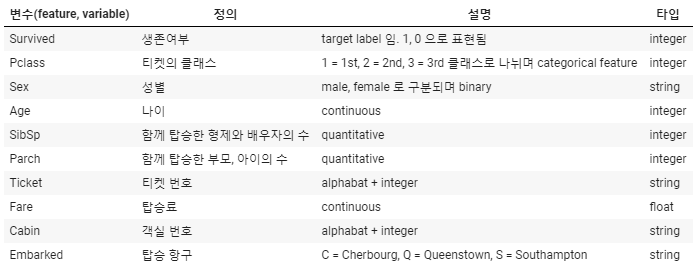

- Feature Engineering은 머신러닝 알고리즘을 작동하기 위해 데이터에 대한 도메인 지식을 활용하여 특징(Feature)을 만들어내는 과정이다. [출처](https://en.wikipedia.org/wiki/Feature_engineering)
- 또는 머신러닝 모델을 위한 데이터 테이블의 컬럼(특징)을 생성하거나 선택하는 작업을 의미한다.
- 간단히 정리하면, 모델의 성능을 높이기 위해, 모델에 입력할 데이터를 만들기 위해 주어진 초기 데이터로부터 특징을 가공하고 생성하는 전체 과정을 의미한다.

### Null data check

describe() 메소드를 쓰면 각 feature가 가진 통계치들을 반환해준다.

In [22]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 이 테이블을 보면 PassengerId 숫자와 다른, null data가 존재하는 열(feature)이 있는 것 같다고 하는데 공부가 필요하다.
- 이를 좀 더 보기 편하도록 그래프로 시각화해서 살펴본다.

In [24]:
for col in df_train.columns:
  msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [25]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- Train, Test 데이터셋에서 Age(둘 다 약 20%), Cabin(둘 다 약 80%), Embarked(Train만 0.22%) null data가 존재하는 것을 볼 수 있다.
- missingno(MSNO)라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있다.

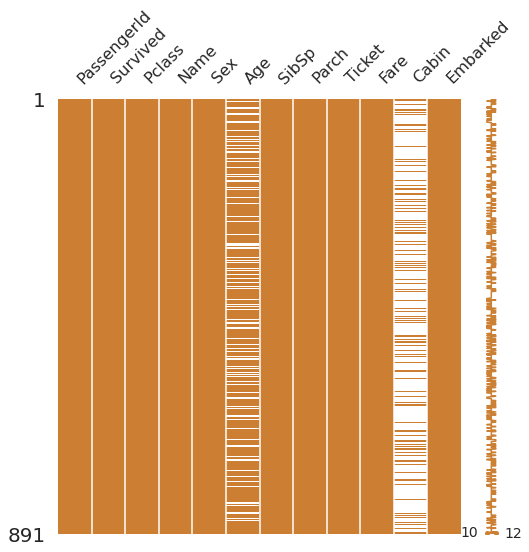

In [26]:
msno.matrix(df = df_train.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))

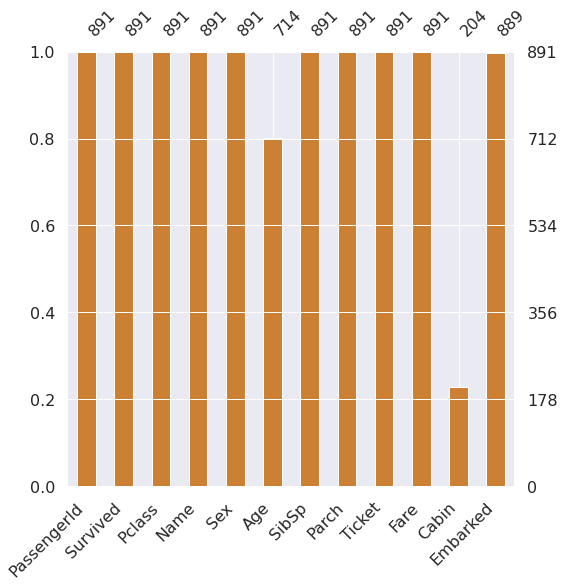

In [27]:
msno.bar(df = df_train.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))

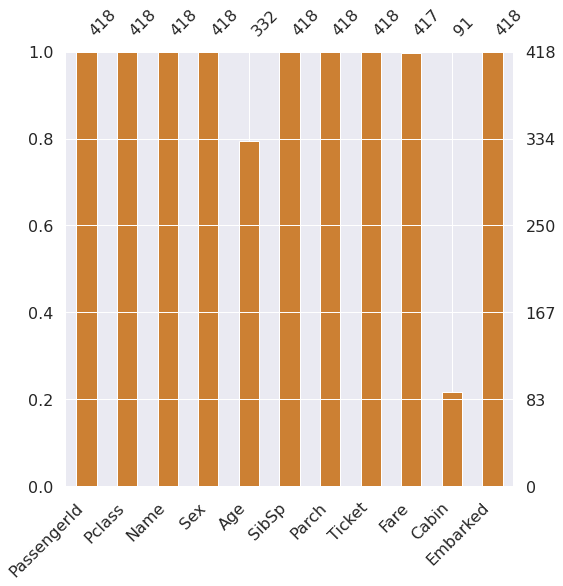

In [28]:
msno.bar(df = df_test.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))

### Target label 확인

- target label이 어떤 분포(distribution)를 가지고 있는 지 확인해봐야 한다.
- binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있다.

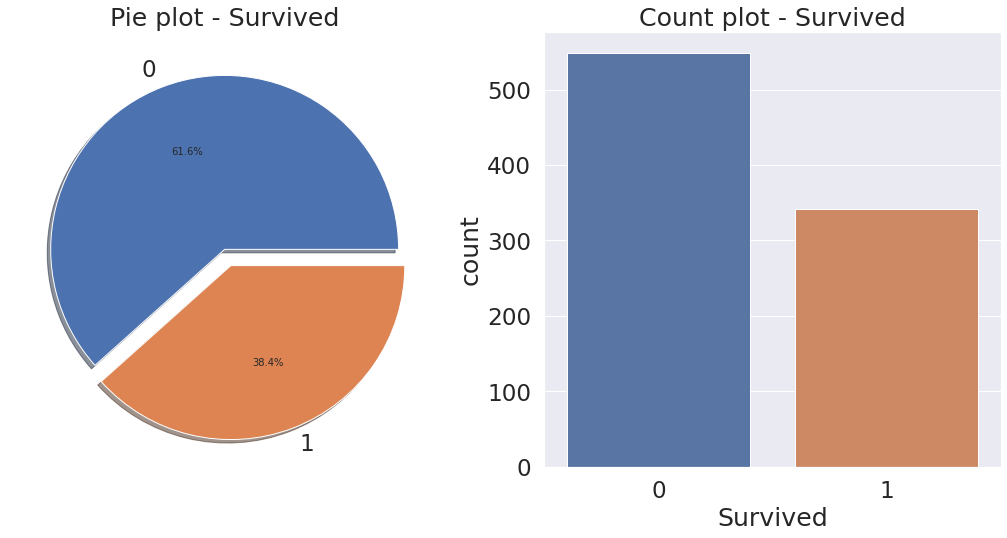

In [29]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 38.4%가 살아남았다는 걸 알 수 있다.
- target label의 분포가 제법 균일(balanced)하다.
- 불균일한 경우, 예를 들어 100 중 1이 99, 0이 1개인 경우에는 만약 모델이 모든 것을 1이라 해도 정확도가 99%가 나오게 된다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 된다.

## EDA 탐색적 데이터 분석

- Exploratory Data Analysis. 많은 데이터 안의 숨겨진 사실을 찾기 위해서는 적절한 시각화가 필요하다.
- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있다. 특정 목적에 맞는 소스코드를 정리해서 필요할 때마다 참고하면 편하다.

### Pclass

- Pclass는 서수형 데이터(ordinal)이다. 카테고리이면서, 순서가 있는 데이터 타입이다.
- Pclass에 따른 생존률의 차이를 살펴보겠다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe엣는 groupby를 사용하면 쉽게 할 수 있다. 또한 pivot이라는 메소드도 있다.
- 'Pclass', "Survived'를 가져온 후, Pclass로 묶는다. 그러고 나면 각 Pclass마다 0과 1이 count가 되는데, 이를 평균 내면 각 Pclass별 생존률이 나온다.

- 아래와 같이 count()를 하면, 각 Pclass에 몇 명이 있는 지 확인할 수 있다.

In [30]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


아래와 같이 sum()을 하면, 216명 중 생존한(Survived = 1) 사람의 총합을 주게 된다.

In [31]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- pandas의 [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)을 사용하면 위 과정을 좀 더 수월하게 볼 수 있다.

In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

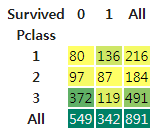

- 그룹화된 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있다.

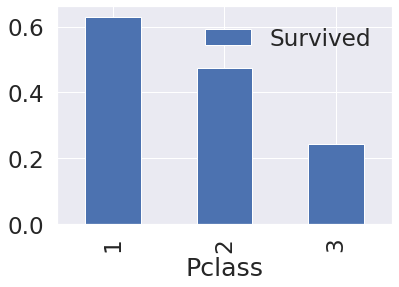

In [33]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar()

- Pclass가 좋을 수록(1st) 생존률이 높은 것을 확인할 수 있다.
- seaborn의 countplot을 이용하면 특정 label에 따른 개수를 확인해볼 수 있다.

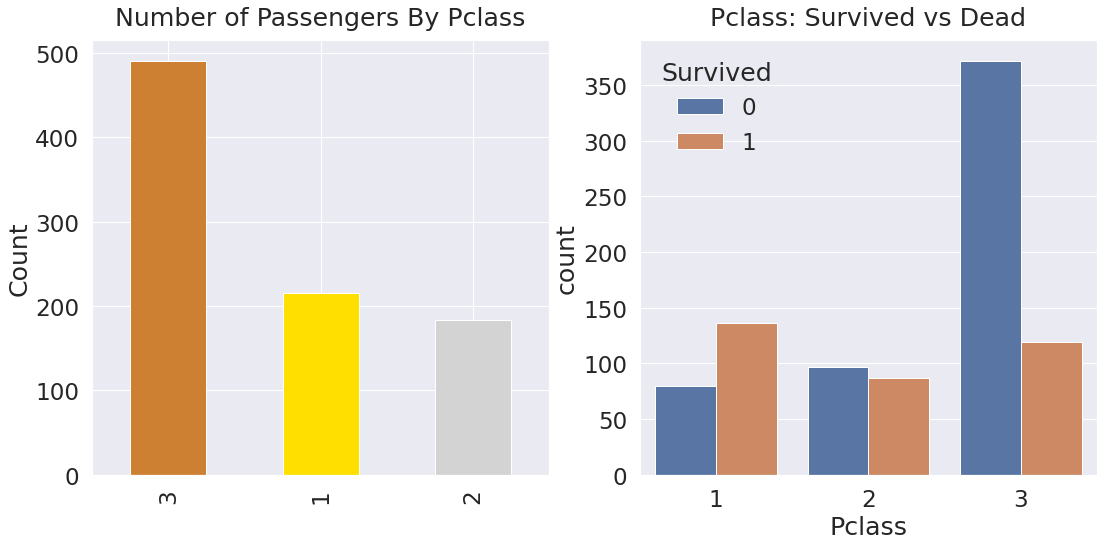

In [34]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
plt.show()

- Pclass가 높을 수록, 생존 확률이 높은 걸 확인할 수 있다? Pclass 1, 2, 3 순서대로 63%, 48%, 25% 이다.
- 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있다.

### Sex

- 성별로 생존률이 어떻게 달라지는 지 확인해보겠다.
- 마찬가지로 pandas groupby와 seaborn countplot을 사용해서 시각화해본다.

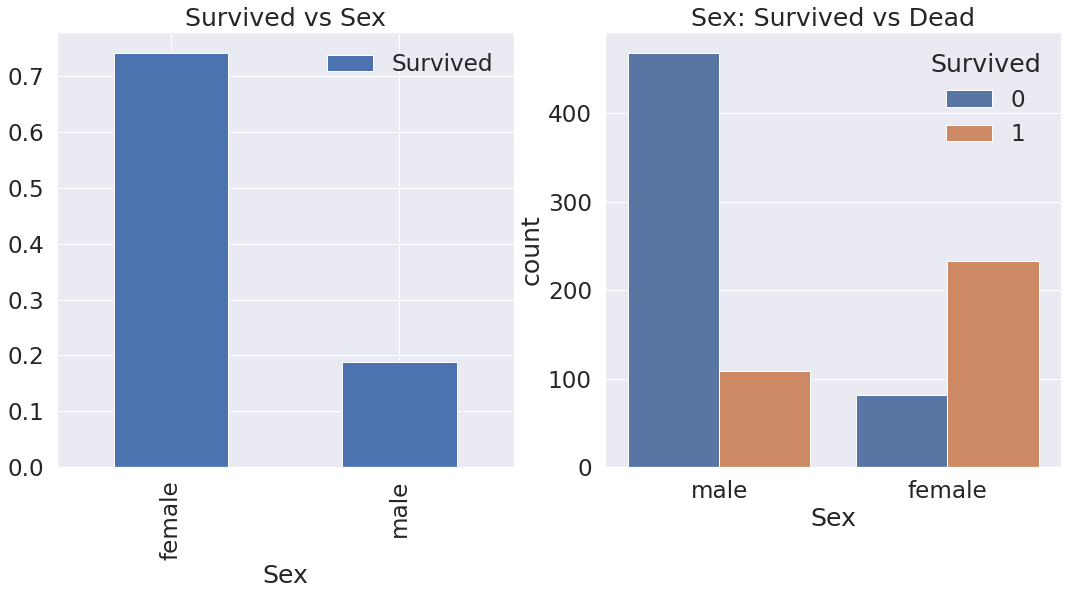

In [35]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여자가 생존할 확률이 높은 걸 확인할 수 있다.

In [36]:
df_train[['Sex', "Survived"]].groupby(['Sex'], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

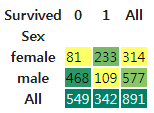

- Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature 임을 알 수 있다.

### Both Sex and Pclass

- Sex, Pclass 2가지에 관하여 생존이 어떻게 달라지는 지 확인해 본다.
- seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

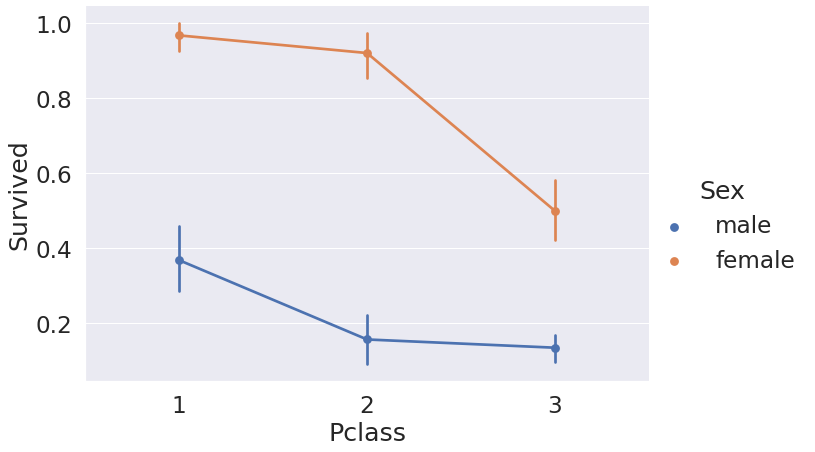

In [38]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train,
               size = 6, aspect = 1.5)

- 모든 클래스에서 여자가 살 확률이 남자보다 높은 걸 알 수 있다.
- 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높다.
- hue = 'Sex' 대신 col = 'Pclass'로 하면 아래와 같아진다. (column)

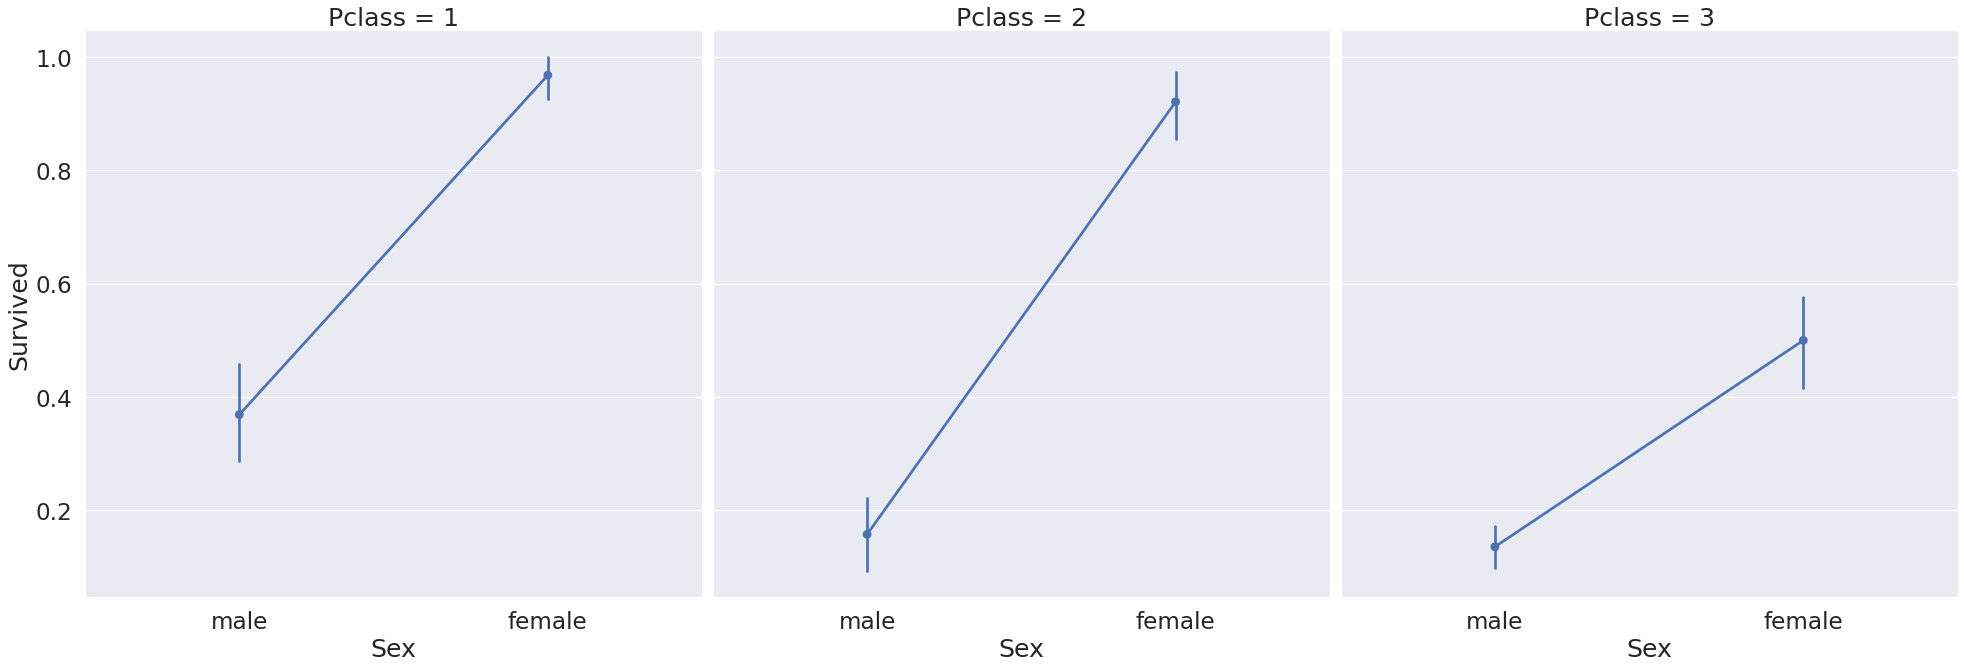

In [39]:
sns.factorplot(x = 'Sex', y = "Survived", col = 'Pclass',
               data = df_train, satureation = 5,
               size = 9, aspect = 1)

### Age

- Age Feature를 살펴보자.

In [40]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


- 생존에 따른 Age의 히스토그램을 그려보겠다.

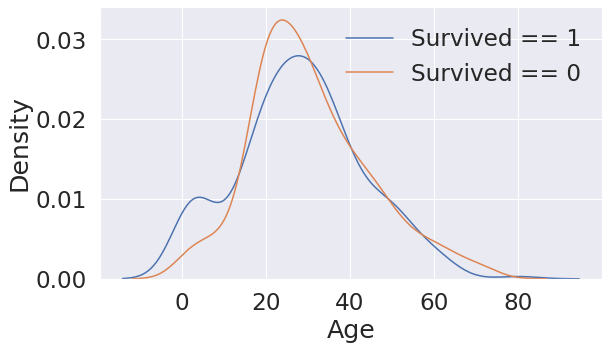

In [41]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 생존자 중 나이가 어린 경우가 많음을 볼 수 있다.

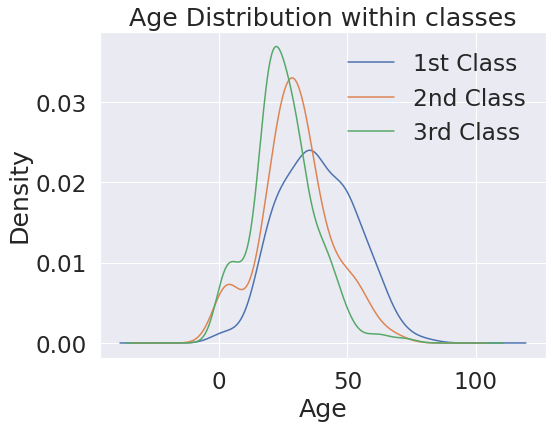

In [42]:
# Age distribution withing classes
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- Pclass가 높을 수록 나이 많은 사람의 비중이 커진다.

- 나이대가 변하면서 생존률이 어떻게 되는 지 보려고 한다.
- 나이 범위를 점점 넓혀가며, 생존률이 어떻게 되는 지 한 번 보자.

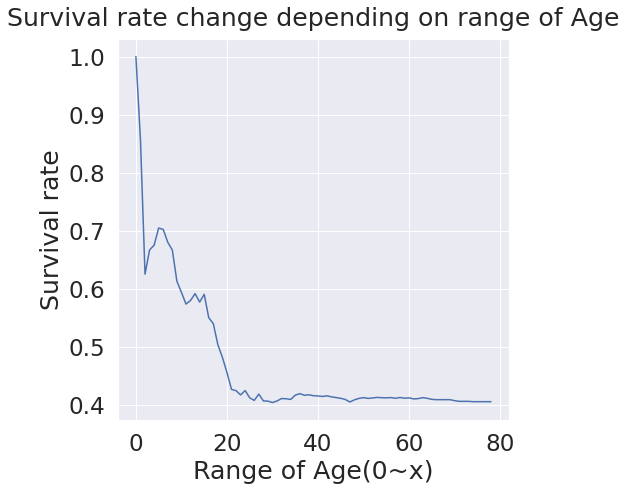

In [43]:
cummulate_survival_ratio = []
for i in range(1, 80):
  cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존률이 확실히 높은 것을 확인할 수 있다.
- Age는 중요한 Feature로 쓰일 수 있음을 확인했다.

### Pclass, Sex, Age

- Sex, Pclass, Age, Sruvived 모두에 대해서 보고 싶다면, 이를 쉽게 그려주는 seaborn의 biolinplot을 사용한다.
- x축은 우리가 나눠서 보고 싶어하는 case(Pclass, Sex)를 나타내고, y축은 보고 싶어하는 distribution(Age)이다.

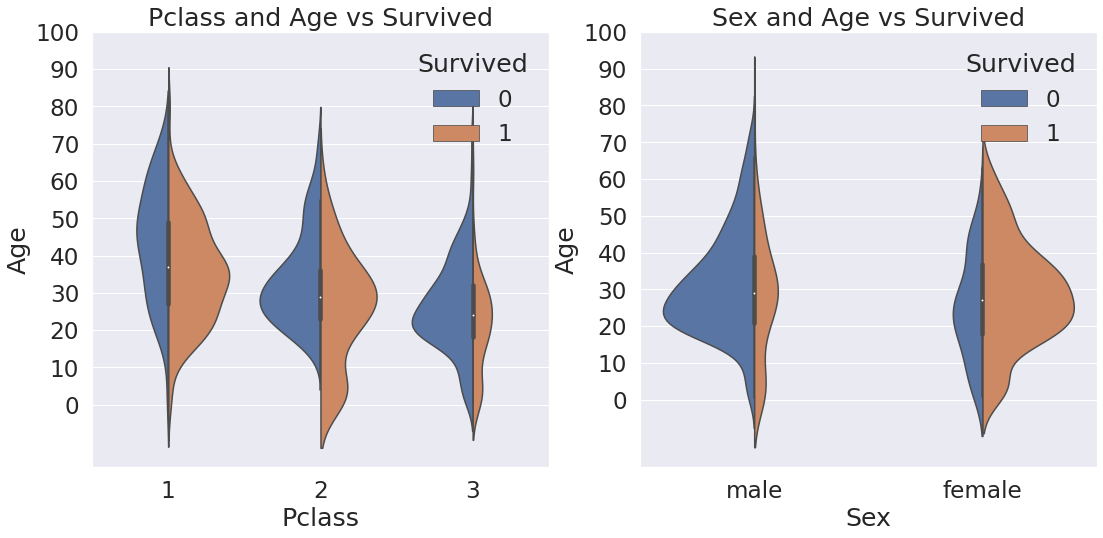

In [44]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
sns.violinplot("Pclass", "Age", hue = "Survived", data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue = "Survived", data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- 왼쪽 그림은 Pclass별로 Age의 분포가 어떻게 다른 지, 거기에 생존여부에 따라 구분한 그래프이다.
- 오른쪽 그림은 Sex, Survived에 따른 분포가 어떻게 다른 지 보여주는 그래프이다.
- Survived만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한 것을 볼 수 있다.
- 오른쪽 그림에서, 명확히 여자가 생존을 많이 한 것을 볼 수 있다.
- 여성과 아이를 먼저 챙겼다고 분석해볼 수 있다.

### Embarked

### Family - SibSp(형제, 자매) + Parch(부모, 자녀)

### Fare

### Cabin

### Ticket